### Step 0: GIT - setting branch master, adding, commits, and pushing

Set branch master at the beginning.

For every change, add, commit, push

In [ ]:
# make sure you are in the right working directory

In [38]:
!pwd

/c/Users/schwedhelmramc2/Documents/Python Scripts/Final project


In [ ]:
!git remote add origin https://github.com/caroschwedh/BIOF309-final-project.git

In [104]:
!git add DMV_bees.ipynb
!git add README.md

In [105]:
!git commit -m "first pushed commit"

On branch master
Changes not staged for commit:
	modified:   DMV_bees.ipynb

no changes added to commit


In [ ]:
!git push

In [106]:
# for cheching origin:
#!git remote -v

origin	git@github.com:caroschwedh/BIOF309-final-project.git (fetch)
origin	git@github.com:caroschwedh/BIOF309-final-project.git (push)


In [110]:
# for revmoving origin (if you made a mistake when you added it)
#!git remote rm origin

fatal: No such remote: 'origin'


In [43]:
# forcing push to new origin master (avoid doing this, as it may rewrite and result in loss of commits)
#!git push -uf origin master

Branch 'master' set up to track remote branch 'master' from 'origin'.


To https://github.com/caroschwedh/BIOF309-final-project.git
 + 9ac6958...bdd547f master -> master (forced update)


In [44]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   .ipynb_checkpoints/DMV_bees-checkpoint.ipynb
	modified:   DMV_bees.ipynb
	modified:   README.md

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/README-checkpoint.md

no changes added to commit (use "git add" and/or "git commit -a")


### Step 1: download pregenerated dataset from iNaturalist as follows:

1. Go to iNaturalist.org and sign into your account.
2. Go to observations > export and create a Query with the following criteria in the following fields:

    Filter: quality grade Research
    
    Place: DMV, US
    
    Taxon: Apis mellifera
    
3. Create export

### Step 2: import necessary packages and functions

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

### Step 3: unzip and upload dataset to project folder

Import dataset

In [5]:
iNat_monitor = pd.read_csv('observations-71449.csv', header=0, parse_dates=True, squeeze=True)

In [6]:
# check first rows
iNat_monitor.head()

,id,observed_on_string,observed_on,time_observed_at,time_zone,out_of_range,user_id,user_login,created_at,updated_at,...,geoprivacy,taxon_geoprivacy,coordinates_obscured,positioning_method,positioning_device,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id
0,330317,4/26/2013 12:10,4/26/2013,2013-04-26 16:10:28 UTC,Eastern Time (US & Canada),NaN,14389,sdroege,2013-07-12 19:32:49 UTC,2017-11-09 19:02:58 UTC,...,NaN,NaN,False,NaN,NaN,Honey Bee,Apis mellifera,Western Honey Bee,Insecta,47219
1,330329,4/25/2013 17:25,4/25/2013,2013-04-25 21:25:16 UTC,Eastern Time (US & Canada),NaN,14389,sdroege,2013-07-12 19:38:12 UTC,2017-11-09 19:03:00 UTC,...,NaN,NaN,False,NaN,NaN,Honey Bee,Apis mellifera,Western Honey Bee,Insecta,47219
2,534926,9/22/2012 10:16,9/22/2012,2012-09-22 14:16:01 UTC,Eastern Time (US & Canada),NaN,30601,calopteryx,2014-02-18 04:55:08 UTC,2017-11-09 19:24:06 UTC,...,NaN,NaN,False,NaN,NaN,Apis mellifera,Apis mellifera,Western Honey Bee,Insecta,47219
3,548320,6/11/2013 6:20,6/11/2013,2013-06-11 10:20:18 UTC,Eastern Time (US & Canada),NaN,30601,calopteryx,2014-03-02 04:21:14 UTC,2017-11-09 19:26:51 UTC,...,NaN,NaN,False,NaN,NaN,Apis mellifera,Apis mellifera,Western Honey Bee,Insecta,47219
4,775199,7/8/2014 18:00,7/8/2014,2014-07-08 22:00:00 UTC,Eastern Time (US & Canada),NaN,31092,ecologyelise,2014-07-08 22:25:03 UTC,2018-12-12 06:28:44 UTC,...,obscured,NaN,True,NaN,NaN,Western Honey Bee,Apis mellifera,Western Honey Bee,Insecta,47219


### Step 4: Create season variable 

In [21]:
#convert pandas series to dataframe and observed_on to datetime64
df_iNat = pd.DataFrame({'observed_on':iNat_monitor.observed_on, 'user_id':iNat_monitor.user_id})
df_iNat["observed_on"] = df_iNat["observed_on"].astype("datetime64")

# Observation count variable
df_iNat['count'] = 1

print(df_iNat.head())

  observed_on  user_id  count
0  2013-04-26    14389      1
1  2013-04-25    14389      1
2  2012-09-22    30601      1
3  2013-06-11    30601      1
4  2014-07-08    31092      1


In [22]:
# Convert observed_on to string
df_iNat['observed_on'] = df_iNat.observed_on.astype(str)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


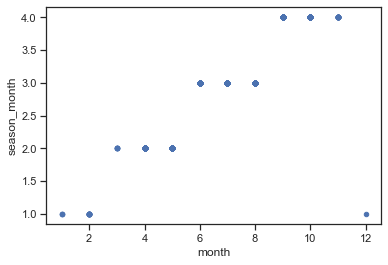

In [33]:
# Create season variable as new_month (1 for Dec-Feb, 2 for Mar-May, 3 for Jun-Aug, 4 for Sep-Nov)
df_iNat['month'] = df_iNat.observed_on.str.slice(start=5, stop=7).astype(int)
df_iNat['season_month'] = df_iNat.month.apply(lambda x: (x%12 + 3)//3)

# check
df_iNat.plot.scatter(x='month',y='season_month')

In [34]:
# now rename to season names
df_iNat.loc[df_iNat['season_month'] ==2, 'season'] = 'spring'
df_iNat.loc[df_iNat['season_month'] ==3, 'season'] = 'summer'
df_iNat.loc[df_iNat['season_month'] ==4, 'season'] = 'fall'
df_iNat.loc[df_iNat['season_month'] ==1, 'season'] = 'winter'

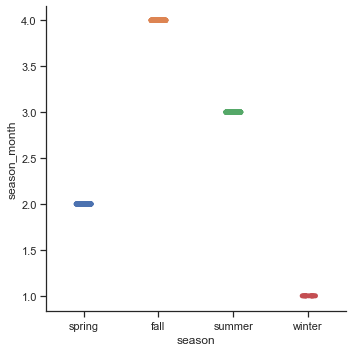

In [35]:
# check that 2 corresponds to spring, 3 to summer, 4 to fall, 1 to winter
sns.catplot(x="season", y="season_month", data=df_iNat)

In [36]:
# Get a variable for year
df_iNat['year'] = df_iNat.observed_on.str.slice(0,4)
# check
print(df_iNat.head())

  observed_on  user_id  count  month  new_month  season  year  season_month
0  2013-04-26    14389      1      4          2  spring  2013             2
1  2013-04-25    14389      1      4          2  spring  2013             2
2  2012-09-22    30601      1      9          4    fall  2012             4
3  2013-06-11    30601      1      6          3  summer  2013             3
4  2014-07-08    31092      1      7          3  summer  2014             3


### Step 5: Adjust number of observations by number of users

In [42]:
# update git
!git commit -m "add season"

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
	modified:   .ipynb_checkpoints/DMV_bees-checkpoint.ipynb
	modified:   DMV_bees.ipynb
	modified:   README.md

Untracked files:
	.ipynb_checkpoints/README-checkpoint.md

no changes added to commit


In [41]:
!git push

To https://github.com/caroschwedh/BIOF309-final-project.git
 ! [rejected]        master -> master (fetch first)
error: failed to push some refs to 'https://github.com/caroschwedh/BIOF309-final-project.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


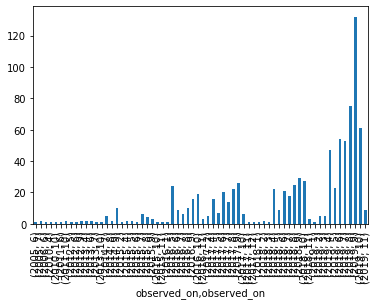

In [14]:
iNat_monitor["observed_on"] = iNat_monitor["observed_on"].astype("datetime64")
iNat_monitor["observed_on"].groupby([iNat_monitor["observed_on"].dt.year, iNat_monitor["observed_on"].dt.month]).count().plot(kind="bar")